In this notebook I am going to load and clean the census data. I will remove any area which are not at the level of a Local Authority and indicate which region each Local Authority is in.

I will then reorganise the data into a form in which it is possible to produce population pyramids for each region in order to address the question: how much do the age profiles of different regions of England and Wales differ?

In [1]:
#Import statements
import pandas as pd
import re
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Generate pandas dataframe from excel sheet
census_demographic_df = pd.read_excel('Data/census2021firstresultsenglandwales1.xlsx', sheet_name='P03', skiprows=lambda x: x in [0,1,2,3,4,5,6]) 
census_demographic_df.head()

,Area code [note 2],Area name,All persons,Females:\nAged 4 years and under\n[note 12],Females:\nAged 5 to 9 years\n[note 12],Females:\nAged 10 to 14 years\n[note 12],Females:\nAged 15 to 19 years\n[note 12],Females:\nAged 20 to 24 years\n[note 12],Females:\nAged 25 to 29 years\n[note 12],Females:\nAged 30 to 34 years\n[note 12],...,Males:\nAged 45 to 49 years\n[note 12],Males:\nAged 50 to 54 years\n[note 12],Males:\nAged 55 to 59 years\n[note 12],Males:\nAged 60 to 64 years\n[note 12],Males:\nAged 65 to 69 years\n[note 12],Males:\nAged 70 to 74 years\n[note 12],Males:\nAged 75 to 79 years\n[note 12],Males:\nAged 80 to 84 years\n[note 12],Males:\nAged 85 to 89 years\n[note 12],Males:\nAged 90 years and over\n[note 12]
0,K04000001,England and Wales,59597300,1577300,1720400,1753100,1653100,1793300,1991900,2145200,...,1867900,2027500,1978300,1699600,1428200,1419500,1008900,668200,372700,169200
1,E92000001,England,56489800,1501600,1634400,1664100,1568100,1701500,1897400,2044400,...,1777100,1922800,1869600,1602000,1341900,1331800,947200,628600,351400,159800
2,E12000001,North East,2647100,65600,73000,75300,73600,80500,81800,87100,...,77800,89600,94100,85600,74200,71100,47300,31800,17100,7100
3,E06000047,County Durham,522100,12000,13800,14400,15300,16400,15000,16000,...,15400,18600,19500,17200,15400,14800,10300,6700,3400,1400
4,E06000005,Darlington,107800,2700,3000,3300,2800,2800,3300,3600,...,3300,3800,3900,3400,3000,2800,2000,1400,800,300


In [3]:
#Use regexes to clean column names
pattern = '\\n'
census_demographic_df.rename(columns=(lambda x : re.sub(pattern, '', x)), inplace=True)
pattern2 = '\[note [1-9]+\]'
census_demographic_df.rename(columns=(lambda x : re.sub(pattern2, '', x)), inplace=True)
census_demographic_df

,Area code,Area name,All persons,Females:Aged 4 years and under,Females:Aged 5 to 9 years,Females:Aged 10 to 14 years,Females:Aged 15 to 19 years,Females:Aged 20 to 24 years,Females:Aged 25 to 29 years,Females:Aged 30 to 34 years,...,Males:Aged 45 to 49 years,Males:Aged 50 to 54 years,Males:Aged 55 to 59 years,Males:Aged 60 to 64 years,Males:Aged 65 to 69 years,Males:Aged 70 to 74 years,Males:Aged 75 to 79 years,Males:Aged 80 to 84 years,Males:Aged 85 to 89 years,Males:Aged 90 years and over
0,K04000001,England and Wales,59597300,1577300,1720400,1753100,1653100,1793300,1991900,2145200,...,1867900,2027500,1978300,1699600,1428200,1419500,1008900,668200,372700,169200
1,E92000001,England,56489800,1501600,1634400,1664100,1568100,1701500,1897400,2044400,...,1777100,1922800,1869600,1602000,1341900,1331800,947200,628600,351400,159800
2,E12000001,North East,2647100,65600,73000,75300,73600,80500,81800,87100,...,77800,89600,94100,85600,74200,71100,47300,31800,17100,7100
3,E06000047,County Durham,522100,12000,13800,14400,15300,16400,15000,16000,...,15400,18600,19500,17200,15400,14800,10300,6700,3400,1400
4,E06000005,Darlington,107800,2700,3000,3300,2800,2800,3300,3600,...,3300,3800,3900,3400,3000,2800,2000,1400,800,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,W06000018,Caerphilly,175900,4600,5100,5300,4500,4400,5600,6000,...,5400,6200,6300,5400,4700,4800,3300,2100,1000,400
371,W06000019,Blaenau Gwent,66900,1700,1800,1900,1600,1800,2300,2400,...,2100,2400,2600,2100,1900,1900,1300,800,400,100
372,W06000020,Torfaen,92300,2400,2600,2700,2300,2300,3000,3300,...,2600,3100,3300,2900,2500,2500,1800,1100,600,300
373,W06000021,Monmouthshire,93000,1900,2200,2500,2200,1800,2200,2400,...,2800,3500,3800,3300,3000,3100,2300,1500,900,400


In [4]:
#Delete whitespace in 'Area code' column name
census_demographic_df=census_demographic_df.rename(columns = {'Area code ':'Area code'})

In order to keep only a list of Local Authorities and remove the other categories which aggregate the Local Authorities (LAs) (so removing the Metropolitan Counties (E11), Counties (E10), Regions (E12), Inner and Outer London (E13), and countries) I shall keep only those rows where the Area Code is E06-E09 or W06 (the Welsh LAs). Before I do this I am going to extract the regions and Wales into a separate dataframe to use it to check totals later. 

In [5]:
#Keep only the regions of England and Wales as a whole and put in regions dataframe
patternKeep = "^E12|W92"
keep = census_demographic_df['Area code'].str.contains(patternKeep)
regions_demographic_df = census_demographic_df[keep]

#Keep only the local authorities of England and Wales
patternKeep = "^E0[6-9]|W06"
keep = census_demographic_df['Area code'].str.contains(patternKeep)
census_demographic_df = census_demographic_df[keep]

In [6]:
#Use regex to remove notes from Local Authority names
pattern_note = '\s\[note\s[0-9]+\]'
census_demographic_df['Area name'] = [re.sub(pattern_note, '', str(x)) for x in census_demographic_df['Area name']] 

I would like to indicate which region each Local Authority is in as I want to look at the data at both a regional and Local Authority level. For Wales there doesn't appear to be any regions but as the overall population of Wales (approximately 3 million) is on a similar par to the regions I am going to group the Welsh authorities together and indicate they are in Wales. 

In [7]:
#Reset index
census_demographic_df.reset_index(level=None, inplace=True)
census_demographic_df.drop ('index', axis=1, inplace = True)

#Include a column with the region each local authority is in
census_demographic_df.loc[range(0,12),'Region'] = 'North East'
census_demographic_df.loc[range(12,51),'Region'] = 'North West'
census_demographic_df.loc[range(51,72),'Region'] = 'Yorkshire and the Humber'
census_demographic_df.loc[range(72,107),'Region'] = 'East Midlands'
census_demographic_df.loc[range(107,137),'Region'] = 'West Midlands'
census_demographic_df.loc[range(137,182),'Region'] = 'East of England'
census_demographic_df.loc[range(182,215),'Region'] = 'London'
census_demographic_df.loc[range(215,279),'Region'] = 'South East'
census_demographic_df.loc[range(279,309),'Region'] = 'South West'
census_demographic_df.loc[range(309,331),'Region'] = 'Wales'

Now to check if I have correctly assigned all the regions/Wales. I will do this by grouping according to the region column and then summing the 'All persons' column and manually checking this against the totals on the excel sheet.

In [8]:
census_demographic_df.to_csv('cleaned_census_df.csv')

In [9]:
#Groupby region and then sum the columns
regions_sum_df = census_demographic_df.groupby(['Region']).sum(numeric_only = True)
regions_sum_df

,All persons,Females:Aged 4 years and under,Females:Aged 5 to 9 years,Females:Aged 10 to 14 years,Females:Aged 15 to 19 years,Females:Aged 20 to 24 years,Females:Aged 25 to 29 years,Females:Aged 30 to 34 years,Females:Aged 35 to 39 years,Females:Aged 40 to 44 years,...,Males:Aged 45 to 49 years,Males:Aged 50 to 54 years,Males:Aged 55 to 59 years,Males:Aged 60 to 64 years,Males:Aged 65 to 69 years,Males:Aged 70 to 74 years,Males:Aged 75 to 79 years,Males:Aged 80 to 84 years,Males:Aged 85 to 89 years,Males:Aged 90 years and over
Region,,,,,,,,,,,,,,,,,,,,,
East Midlands,4879800,123400,138800,141500,140000,151400,152400,163600,157400,147900,...,152100,171200,167800,144600,123500,125800,90300,57000,31300,13500
East of England,6334500,170000,185900,187700,165900,167300,196800,219300,215800,206900,...,202500,218300,212800,182500,154200,159600,115100,76700,44300,20600
London,8800000,258900,260200,262000,240300,304700,412200,422500,382700,343000,...,292800,280000,247800,197000,145600,124500,83900,60000,34700,16000
North East,2647100,65600,72900,75300,73500,80500,82000,86900,84300,77900,...,77600,89500,94100,85600,74200,71100,47400,32100,17100,7100
North West,7417300,199000,217600,219700,211100,227400,243100,261000,248600,226200,...,227000,254500,252800,219000,184500,182600,125500,83000,44000,18600
South East,9278400,241600,269200,277200,253600,254100,277200,312900,314000,309300,...,302200,322800,315800,266700,223300,227900,165200,110100,63700,30700
South West,5701300,133800,151800,156400,152900,162700,166900,182400,175200,168200,...,171000,194400,199400,176700,155700,164100,120700,78400,44700,21600
Wales,3107700,75800,86100,88900,85200,91700,94500,101000,95900,89600,...,91000,104700,108600,97600,86400,87800,61700,39600,21500,9600
West Midlands,5950600,163700,179600,182300,173600,178800,189200,206400,197000,183800,...,184400,205100,195100,168300,143700,141000,105300,69600,37700,16800


Now I will produce a dataframe which only includes the data for females and the total population for each region in order to get a dataframe in the right format to produce a population pyramid.

In [10]:
#Create list of columns with data on females only
females_cols = [col for col in regions_sum_df.columns if 'Females' in col]

#Append 'All persons' column
females_cols.append('All persons')

#Create new database with only female columns and 'All persons' column
female_regions_census_df = regions_sum_df[females_cols]
female_regions_census_df.head()


,Females:Aged 4 years and under,Females:Aged 5 to 9 years,Females:Aged 10 to 14 years,Females:Aged 15 to 19 years,Females:Aged 20 to 24 years,Females:Aged 25 to 29 years,Females:Aged 30 to 34 years,Females:Aged 35 to 39 years,Females:Aged 40 to 44 years,Females:Aged 45 to 49 years,Females:Aged 50 to 54 years,Females:Aged 55 to 59 years,Females:Aged 60 to 64 years,Females:Aged 65 to 69 years,Females:Aged 70 to 74 years,Females:Aged 75 to 79 years,Females:Aged 80 to 84 years,Females:Aged 85 to 89 years,Females:Aged 90 years and over,All persons
Region,,,,,,,,,,,,,,,,,,,,
East Midlands,123400,138800,141500,140000,151400,152400,163600,157400,147900,156400,175400,172300,147700,130200,135400,100900,70400,45200,28800,4879800
East of England,170000,185900,187700,165900,167300,196800,219300,215800,206900,208500,224600,219900,187000,165500,176800,131000,95000,63700,42100,6334500
London,258900,260200,262000,240300,304700,412200,422500,382700,343000,301400,293800,263700,207700,160700,144600,105500,81200,52300,34500,8800000
North East,65600,72900,75300,73500,80500,82000,86900,84300,77900,81200,93700,98400,89600,77500,77300,53900,41700,26300,15500,2647100
North West,199000,217600,219700,211100,227400,243100,261000,248600,226200,231400,259300,260100,224800,191700,197200,144400,107500,67100,40800,7417300


In [11]:
#Create new dataframe to store percentages of females in each age group by region
female_regions_proportions_df  = pd.DataFrame()
for i in females_cols: 
    female_regions_proportions_df['%'+ i] = female_regions_census_df [i]/female_regions_census_df ['All persons']*100

#Create list of columns of female percentages to sum
cols_to_sum = female_regions_proportions_df.columns[ : female_regions_proportions_df.shape[1]-1]

#Create new column with sum of female percentages
female_regions_proportions_df['Total'] = female_regions_proportions_df[cols_to_sum].sum(axis=1)

  

#Remove '%All persons' and 'Total' columns
female_regions_proportions_minus_totals_df = female_regions_proportions_df.copy()
female_regions_proportions_minus_totals_df .drop(['%All persons', 'Total'], axis=1, inplace = True)

#Remove % Females: from column names
female_regions_proportions_minus_totals_df.columns = female_regions_proportions_minus_totals_df.columns.map(lambda x: x.removeprefix("%Females:"))
   


female_regions_proportions_df.head()

,%Females:Aged 4 years and under,%Females:Aged 5 to 9 years,%Females:Aged 10 to 14 years,%Females:Aged 15 to 19 years,%Females:Aged 20 to 24 years,%Females:Aged 25 to 29 years,%Females:Aged 30 to 34 years,%Females:Aged 35 to 39 years,%Females:Aged 40 to 44 years,%Females:Aged 45 to 49 years,...,%Females:Aged 55 to 59 years,%Females:Aged 60 to 64 years,%Females:Aged 65 to 69 years,%Females:Aged 70 to 74 years,%Females:Aged 75 to 79 years,%Females:Aged 80 to 84 years,%Females:Aged 85 to 89 years,%Females:Aged 90 years and over,%All persons,Total
Region,,,,,,,,,,,,,,,,,,,,,
East Midlands,2.528792,2.844379,2.899709,2.868970,3.102586,3.123079,3.352596,3.225542,3.030862,3.205049,...,3.530882,3.026763,2.668142,2.774704,2.067708,1.442682,0.926267,0.590188,100.0,50.803312
East of England,2.683716,2.934723,2.963138,2.618991,2.641092,3.106796,3.461994,3.406741,3.266240,3.291499,...,3.471466,2.952088,2.612677,2.791065,2.068040,1.499724,1.005604,0.664614,100.0,50.985871
London,2.942045,2.956818,2.977273,2.730682,3.462500,4.684091,4.801136,4.348864,3.897727,3.425000,...,2.996591,2.360227,1.826136,1.643182,1.198864,0.922727,0.594318,0.392045,100.0,51.498864
North East,2.478184,2.753957,2.844622,2.776623,3.041064,3.097730,3.282838,3.184617,2.942843,3.067508,...,3.717276,3.384836,2.927732,2.920177,2.036191,1.575309,0.993540,0.585546,100.0,51.150315
North West,2.682917,2.933682,2.961994,2.846049,3.065806,3.277473,3.518801,3.351624,3.049627,3.119734,...,3.506667,3.030752,2.584498,2.658649,1.946800,1.449314,0.904642,0.550065,100.0,50.934976


In [12]:
#Create list of columns with data on males only
males_cols = [col for col in regions_sum_df.columns if 'Males' in col]

#Append 'All persons' column
males_cols.append('All persons')

#Create new database with only male columns and 'All persons' column
male_regions_census_df = regions_sum_df[males_cols]
male_regions_census_df.head()

,Males:Aged 4 years and under,Males:Aged 5 to 9 years,Males:Aged 10 to 14 years,Males:Aged 15 to 19 years,Males:Aged 20 to 24 years,Males:Aged 25 to 29 years,Males:Aged 30 to 34 years,Males:Aged 35 to 39 years,Males:Aged 40 to 44 years,Males:Aged 45 to 49 years,Males:Aged 50 to 54 years,Males:Aged 55 to 59 years,Males:Aged 60 to 64 years,Males:Aged 65 to 69 years,Males:Aged 70 to 74 years,Males:Aged 75 to 79 years,Males:Aged 80 to 84 years,Males:Aged 85 to 89 years,Males:Aged 90 years and over,All persons
Region,,,,,,,,,,,,,,,,,,,,
East Midlands,129700,144600,148700,147700,155000,149300,155400,150300,144000,152100,171200,167800,144600,123500,125800,90300,57000,31300,13500,4879800
East of England,179000,195000,197400,177300,175300,191300,205100,202400,199700,202500,218300,212800,182500,154200,159600,115100,76700,44300,20600,6334500
London,270000,271600,273700,249100,284800,374300,385800,353000,324000,292800,280000,247800,197000,145600,124500,83900,60000,34700,16000,8800000
North East,68700,77700,79200,76400,82300,78700,80900,79600,74300,77600,89500,94100,85600,74200,71100,47400,32100,17100,7100,2647100
North West,208700,227700,232500,219900,226100,233800,245400,236900,219100,227000,254500,252800,219000,184500,182600,125500,83000,44000,18600,7417300


In [13]:
#Create new dataframe to store percentages of males in each age group by region
male_regions_proportions_df  = pd.DataFrame()
for i in males_cols: 
    male_regions_proportions_df['%'+ i] = male_regions_census_df [i]/male_regions_census_df ['All persons']*100

#Create list of columns of male percentages to sum
cols_to_sum = male_regions_proportions_df.columns[ : male_regions_proportions_df.shape[1]-1]

#Create new column with sum of male percentages
male_regions_proportions_df['Total'] = male_regions_proportions_df[cols_to_sum].sum(axis=1)


#Remove '%All persons' and 'Total' columns
male_regions_proportions_minus_totals_df = male_regions_proportions_df.copy()
male_regions_proportions_minus_totals_df.drop(['%All persons', 'Total'], axis=1, inplace = True)

#Remove % Males: from column names
male_regions_proportions_minus_totals_df.columns = male_regions_proportions_minus_totals_df.columns.map(lambda x: x.removeprefix("%Males:"))
   


male_regions_proportions_df.head()

,%Males:Aged 4 years and under,%Males:Aged 5 to 9 years,%Males:Aged 10 to 14 years,%Males:Aged 15 to 19 years,%Males:Aged 20 to 24 years,%Males:Aged 25 to 29 years,%Males:Aged 30 to 34 years,%Males:Aged 35 to 39 years,%Males:Aged 40 to 44 years,%Males:Aged 45 to 49 years,...,%Males:Aged 55 to 59 years,%Males:Aged 60 to 64 years,%Males:Aged 65 to 69 years,%Males:Aged 70 to 74 years,%Males:Aged 75 to 79 years,%Males:Aged 80 to 84 years,%Males:Aged 85 to 89 years,%Males:Aged 90 years and over,%All persons,Total
Region,,,,,,,,,,,,,,,,,,,,,
East Midlands,2.657896,2.963236,3.047256,3.026763,3.176360,3.059552,3.184557,3.080044,2.950941,3.116931,...,3.438666,2.963236,2.530841,2.577975,1.850486,1.168081,0.641420,0.276651,100.0,49.219230
East of England,2.825795,3.078380,3.116268,2.798958,2.767385,3.019970,3.237825,3.195201,3.152577,3.196780,...,3.359381,2.881048,2.434288,2.519536,1.817034,1.210830,0.699345,0.325203,100.0,49.082011
London,3.068182,3.086364,3.110227,2.830682,3.236364,4.253409,4.384091,4.011364,3.681818,3.327273,...,2.815909,2.238636,1.654545,1.414773,0.953409,0.681818,0.394318,0.181818,100.0,48.506818
North East,2.595293,2.935288,2.991953,2.886177,3.109063,2.973065,3.056175,3.007064,2.806845,2.931510,...,3.554834,3.233727,2.803068,2.685958,1.790639,1.212648,0.645990,0.268218,100.0,48.868573
North West,2.813692,3.069850,3.134564,2.964691,3.048279,3.152090,3.308482,3.193885,2.953905,3.060413,...,3.408248,2.952557,2.487428,2.461812,1.691990,1.119006,0.593208,0.250765,100.0,49.096032


In [14]:
#Extract index values to list
index_list = female_regions_proportions_df.index.values.tolist()


index_list

['East Midlands',
 'East of England',
 'London',
 'North East',
 'North West',
 'South East',
 'South West',
 'Wales',
 'West Midlands',
 'Yorkshire and the Humber']

In [15]:

def create_dfs(regions):
    """Creates a dictionary of empty dataframes from list of regions in index_list
    with region as key"""
    dfs = {}
    for x in regions:
        dfs[x] = pd.DataFrame()
    return dfs
    
dfs = create_dfs(index_list)



In [16]:
def generate_dataframes(dfs):
    """Iterates through items in dfs dictionary to generate dataframes with females and males columns by age group as 
    % of overall population for each region as dictionary value."""
    for key,val in dfs.items():
        dfs[key] = pd.concat([female_regions_proportions_minus_totals_df.loc[key], male_regions_proportions_minus_totals_df.loc[key]],axis =1)
        dfs[key] = dfs[key].reset_index()
        dfs[key].columns = ['Ages','Females', 'Males']
        dfs[key]['Males'] = dfs[key]['Males'] * -1
        dfs[key] = dfs[key].iloc[::-1]
        
    return dfs


dfs_dict = generate_dataframes(dfs)


print(dfs_dict.values())


dict_values([                      Ages   Females     Males
18  Aged 90 years and over  0.590188 -0.276651
17     Aged 85 to 89 years  0.926267 -0.641420
16     Aged 80 to 84 years  1.442682 -1.168081
15     Aged 75 to 79 years  2.067708 -1.850486
14     Aged 70 to 74 years  2.774704 -2.577975
13     Aged 65 to 69 years  2.668142 -2.530841
12     Aged 60 to 64 years  3.026763 -2.963236
11     Aged 55 to 59 years  3.530882 -3.438666
10     Aged 50 to 54 years  3.594410 -3.508341
9      Aged 45 to 49 years  3.205049 -3.116931
8      Aged 40 to 44 years  3.030862 -2.950941
7      Aged 35 to 39 years  3.225542 -3.080044
6      Aged 30 to 34 years  3.352596 -3.184557
5      Aged 25 to 29 years  3.123079 -3.059552
4      Aged 20 to 24 years  3.102586 -3.176360
3      Aged 15 to 19 years  2.868970 -3.026763
2      Aged 10 to 14 years  2.899709 -3.047256
1        Aged 5 to 9 years  2.844379 -2.963236
0   Aged 4 years and under  2.528792 -2.657896,                       Ages   Females     Males

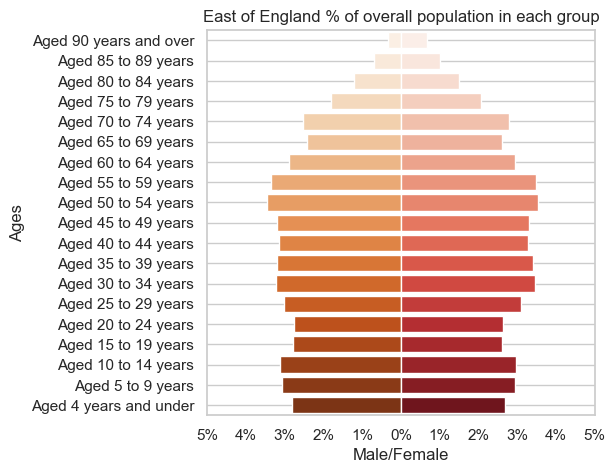

In [17]:
east_of_england = dfs_dict['East of England']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=east_of_england, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=east_of_england, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('East of England % of overall population in each group');

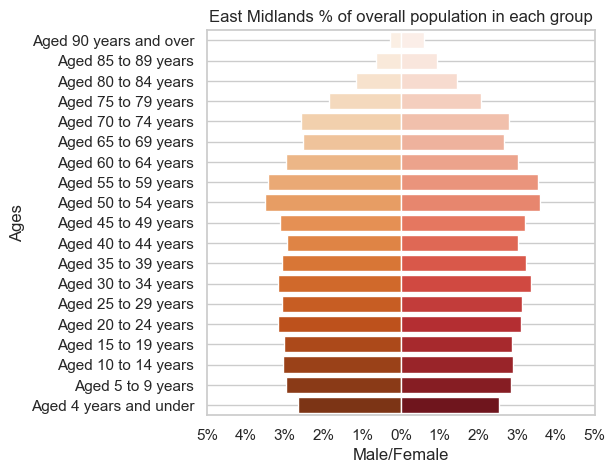

In [18]:
east_midlands = dfs_dict['East Midlands']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=east_midlands, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=east_midlands, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('East Midlands % of overall population in each group');

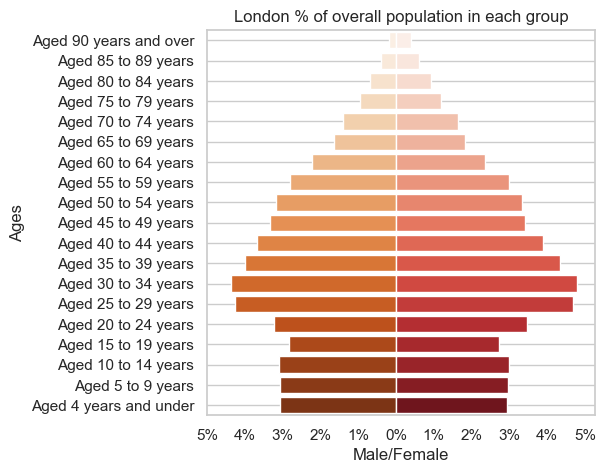

In [19]:
london = dfs_dict['London']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=london, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=london, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('London % of overall population in each group');

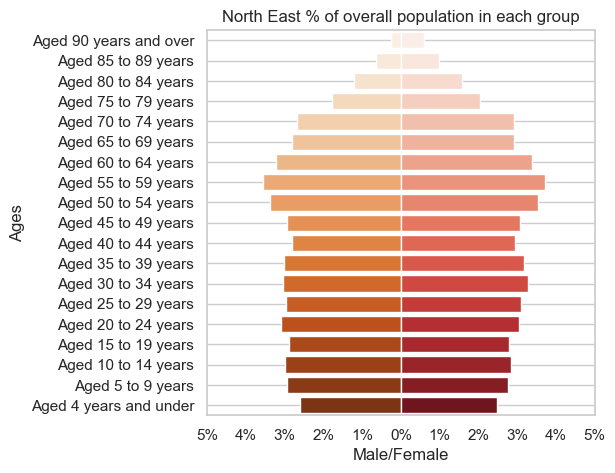

In [20]:
north_east = dfs_dict['North East']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=north_east, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=north_east, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('North East % of overall population in each group');

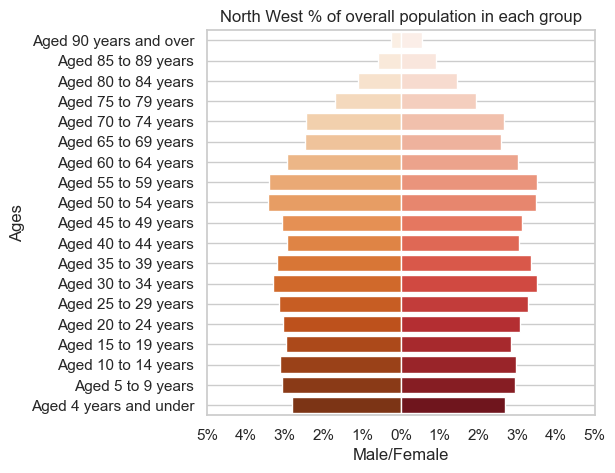

In [21]:
north_west = dfs_dict['North West']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=north_west, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=north_west, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('North West % of overall population in each group');

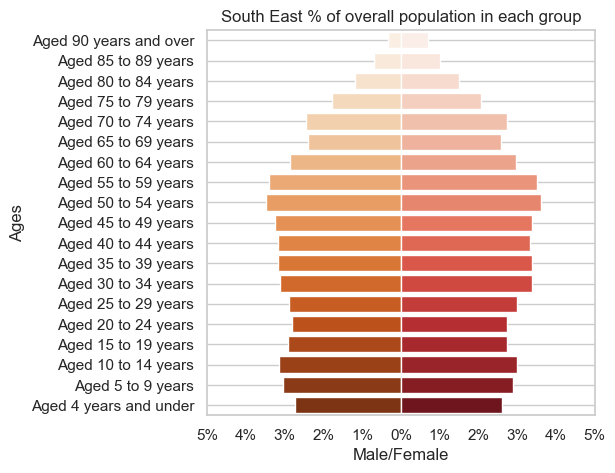

In [22]:
south_east = dfs_dict['South East']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=south_east, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=south_east, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('South East % of overall population in each group');

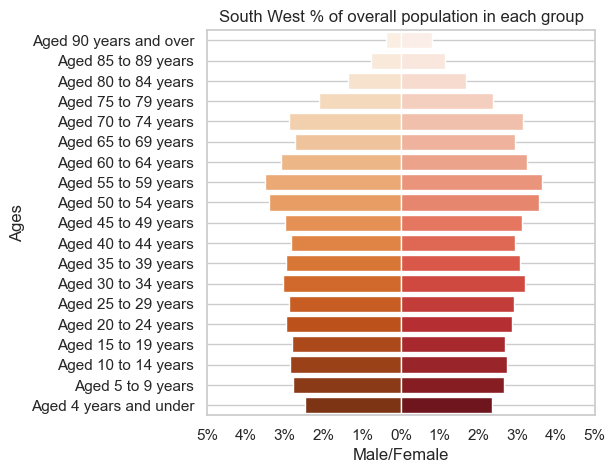

In [23]:
south_west = dfs_dict['South West']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=south_west, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=south_west, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('South West % of overall population in each group');

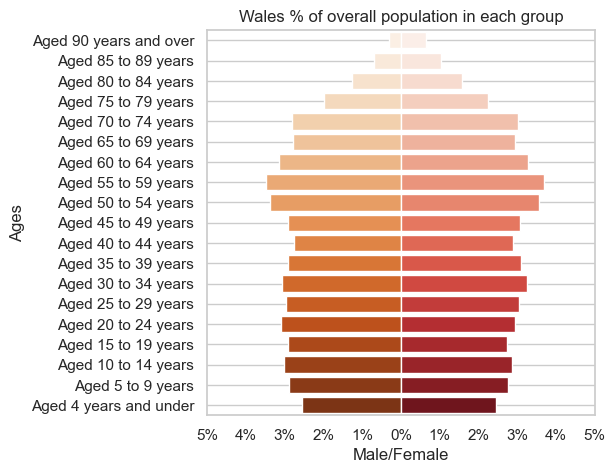

In [24]:
wales = dfs_dict['Wales']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=wales, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=wales, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('Wales % of overall population in each group');

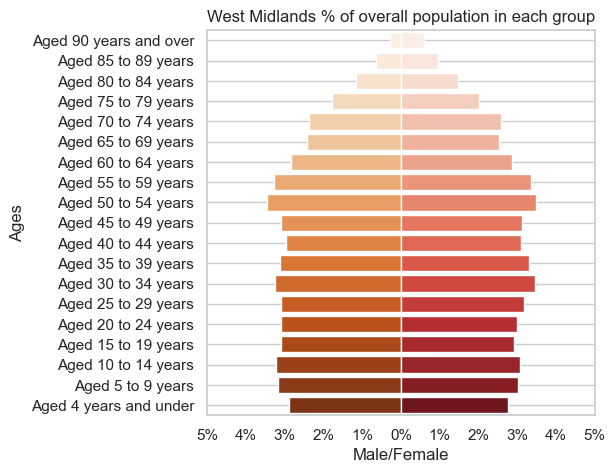

In [25]:
west_midlands = dfs_dict['West Midlands']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=west_midlands, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=west_midlands, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('West Midlands % of overall population in each group');

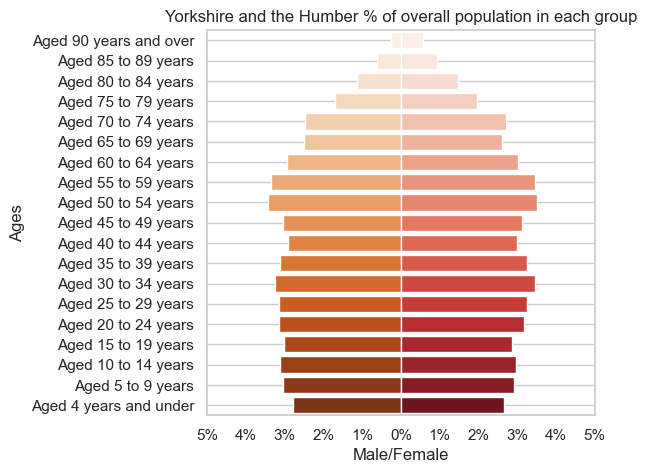

In [26]:
yorkshire = dfs_dict['Yorkshire and the Humber']

# Reset the chart plot size
sns.set(rc={"figure.figsize":(5, 5)},
        style='whitegrid')


ax1 = sns.barplot(x='Males', y='Ages', data=yorkshire, palette="Oranges")
ax2 = sns.barplot(x='Females', y='Ages', data=yorkshire, palette="Reds")

plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[ -5, -4, -3, -2, -1 ,  0,  1,  2, 3, 4,5],
labels=['5%', '4%',  '3%', '2%', '1%',  '0%', '1%', '2%', '3%','4%', '5%'])
plt.title('Yorkshire and the Humber % of overall population in each group');

The population pyramids for much of the regions are quite similar apart from London. They show the proportions of children seems to be between 4 and 6% of the overall population. There is often a small bulge around ages 10-14 presumably reflecting a small “baby boom”. Some regions show a small dip in proportion of people aged 40-49. There is a bulge for all regions except London at either age 50-54 or 55-59 before the proportions steadily decline as the age groups increase.

The population pyramids for the East Midlands, North East, South West and Wales all show a more pronounced “arrowhead” shape at the top of the population pyramids for ages 50-90+. This shows they have a larger proportion of the population over 50 compared with the other regions. 

London with its “Christmas tree” shape is different from the other regions. There is fairly large proportion of children then a big jump in the proportions of 25-34 years old (presumably reflecting people moving to London for work or studying) which then declines quite quickly as the age groups increase. Thus, London looks to have a younger population on average compared to the other regions. 

Overall it seems there is some difference between the age profiles in different regions of England and Wales, however there is a big difference between the age profile of London and the other regions of England and Wales. If I had more time and different data it would be interesting to see if this difference was also reflected in other large UK cities.
